<a href="https://colab.research.google.com/github/debkamalsarkar04-dev/Maxima_Projecto_Scorp/blob/main/07_Time_Series_Analysis_of_Global_Temperature_Data_Spring_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="left" style="background-color: #008080; padding: 20px 10px;">
<h3><b>IDEAS - Institute of Data Engineering, Analytics and Science Foundation</b></h3>
<p>Spring Internship Program 2026</p>
<hr style="width:100%;">
<h3><b>Project Title:</b> Time-Series Analysis of Global Temperature Data</h3>
<h4>Project Notebook</h4>

<blockquote style="border-left: 4px solid #4285F4; padding-left: 15px;">
  <strong>Created by:</strong> Samyabrata Roy<br>
  <strong>Designation:</strong> Associate Software Developer
</blockquote>
<hr style="width:100%;">
</div>

### Question 1: Import Libraries and Load Data (5 Marks)

Import `pandas` as `pd` and `numpy` as `np`. Download the global temperature dataset `monthly_csv.csv` from https://drive.google.com/drive/folders/1TeLp4U4NsXCSgClbF7ODBsaLKpHSWeQr?usp=sharing and load into a pandas DataFrame called `df_temp`. Display the first 5 rows.

**Hint:** Use `pd.read_csv()` and `.head()`.

**Expected Output:**
```
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292
```

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1TeLp4U4NsXCSgClbF7ODBsaLKpHSWeQr

Retrieving folder contents
Processing file 17kxez4KNr3C8mvOjyusTtgsmqqap42Pa Coffe_sales.csv
Processing file 1qYLRmVdH83g0YDnAS3TlBsb7efmjAYkp diabetes.csv
Processing file 1E39TXpZJvDadI-NPXPpuVGyGsI7IMEIr fake.csv
Processing file 1m9MuNL3Y3_URkL21WMLlMjUt1kHkIc_i house_price_india.csv
Processing file 1IxuRnoAfV-LNVcpCt0Ya2CDsOP_tMhuz monthly_csv.csv
Processing file 1oxjO8sVvjO7552kciqyIPz9_h2KiGupq moon-pexels-frank-cone.jpg
Processing file 1VOCbtZwBPfPHSMiz6cW1nwmgUndsbB9N retail_sales_dataset.csv
Processing file 1XV2cjW4V6UcAcnz2RMAbs-CmPvOfTva- true.csv
Processing file 1Ueyii8qb4Jn53y16oAKdrQZQwZrED34h WHO-COVID-19-global-daily-data.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=17kxez4KNr3C8mvOjyusTtgsmqqap42Pa
To: /content/data/Coffe_sales.csv
100% 261k/261k [00:00<00:00, 95.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qYLRmVdH83g0YDnAS3TlBsb7efmjAYkp
T

In [ ]:
# Write your answer here
import pandas as pd
import numpy as np

df_temp = pd.read_csv("/content/data/monthly_csv.csv")
df_temp.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


### Question 2: Convert to Datetime and Sort (5 Marks)

The 'Date' column is currently a string. Convert it to a proper datetime object and then sort the entire DataFrame `df_temp` by this 'Date' column in ascending order. Display the head of the sorted DataFrame.

**Hint:** Use `pd.to_datetime()` for conversion and `.sort_values(by='Date')` for sorting.

**Expected Output:** A table showing the first 5 rows of the dataset, now sorted by date starting from the earliest records.

In [ ]:
# Write your answer here
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_temp = df_temp.sort_values(by='Date')
df_temp.head()

,Source,Date,Mean
3287,GISTEMP,1880-01-06,-0.3000
3286,GCAG,1880-01-06,0.0009
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3282,GCAG,1880-03-06,-0.1357


### Question 3: Data Inspection (5 Marks)

Get a quick overview of your sorted DataFrame. Print the shape and then check for the total number of missing (null) values across the entire DataFrame.

**Hint:** Use `df_temp.shape` to get the dimensions and `df_temp.isnull().sum().sum()` to count all missing values.

**Expected Output:** The shape of the DataFrame and the total count of null values.

In [ ]:
# Write your answer here
print(df_temp.shape)
df_temp.isnull().sum().sum()

(3288, 3)


np.int64(0)

### Question 4: Extract Year and Month (10 Marks)

Create two new columns in `df_temp`: 'Year' and 'Month'. These should contain the year and month numbers extracted from the 'Date' column. Display the head of the DataFrame to show these new columns.

**Hint:** After converting to datetime, you can access the year with `.dt.year` and the month with `.dt.month` on the 'Date' column.

**Expected Output:** The first 5 rows of the DataFrame, now including 'Year' and 'Month' columns.

In [ ]:
# Write your answer here
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month
df_temp.head()

,Source,Date,Mean,Year,Month
3287,GISTEMP,1880-01-06,-0.3000,1880,1
3286,GCAG,1880-01-06,0.0009,1880,1
3284,GCAG,1880-02-06,-0.1229,1880,2
3285,GISTEMP,1880-02-06,-0.2100,1880,2
3282,GCAG,1880-03-06,-0.1357,1880,3


### Question 5: Calculate 12-Month Moving Average (10 Marks)

Calculate the 12-month moving average of the 'Mean' temperature for each 'Source'. Store this in a new column named `Moving_Avg`. Display the last 5 rows of the DataFrame.

**Hint:** Use `.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())`. Use `.tail()` to see the last rows.

**Expected Output:** A table showing the last 5 rows of the DataFrame with the new 'Moving_Avg' column.

In [ ]:
# Write your answer here
df_temp['Moving_Avg'] = (
    df_temp
    .groupby('Source')['Mean']
    .transform(lambda x: x.rolling(window=12, min_periods=1).mean())
)
df_temp.tail()

,Source,Date,Mean,Year,Month,Moving_Avg
4,GCAG,2016-10-06,0.7292,2016,10,0.981917
3,GISTEMP,2016-11-06,0.9300,2016,11,1.017500
2,GCAG,2016-11-06,0.7504,2016,11,0.963992
1,GISTEMP,2016-12-06,0.8100,2016,12,0.992500
0,GCAG,2016-12-06,0.7895,2016,12,0.936292


### Question 6: Filter for the Last 20 Years (10 Marks)

Create a new DataFrame called `df_last20` by filtering `df_temp` to include only data from the last 20 years (inclusive of the latest year in the data). Print the shape of this new DataFrame.

**Hint:** First, find the latest year using `df_temp['Year'].max()`. Then, filter the DataFrame where 'Year' is greater than or equal to `latest_year - 19`.

**Expected Output:** A tuple representing the shape of the filtered `df_last20` DataFrame.

In [ ]:
# Write your answer here
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]
df_last20.shape

(480, 6)

### Question 7: Group by Source (10 Marks)

Group the original `df_temp` DataFrame by the 'Source' column and calculate the mean of the 'Mean' temperature for each source. Display the resulting Series.

**Hint:** Use the `.groupby('Source')['Mean'].mean()` method.

**Expected Output:** A Pandas Series showing the two sources (GCAG, GISTEMP) as the index and their overall average mean temperature as the values.

In [ ]:
# Write your answer here
df_temp.groupby('Source')['Mean'].mean()

,Mean
Source,
GCAG,0.048797
GISTEMP,0.024380


### Question 8: Aggregate by Year (15 Marks)

Group the `df_temp` DataFrame by 'Year' and calculate the average 'Mean' temperature for each year. Display the last 5 entries of this yearly aggregation.

**Hint:** Use `.groupby('Year')['Mean'].mean()` and then `.tail()` on the result.

**Expected Output:** A Series showing the last 5 years in the dataset and their corresponding average mean temperatures.

In [ ]:
# Write your answer here
df_temp.groupby('Year')['Mean'].mean().tail()

,Mean
Year,
2012,0.629517
2013,0.661846
2014,0.742075
2015,0.882408
2016,0.964396


### Question 9: Find the Hottest Month on Average (15 Marks)

Across all years in the `df_temp` dataset, find which month has the highest average 'Mean' temperature. Print the resulting Series which shows the average temperature for each month.

**Hint:** Use `.groupby('Month')['Mean'].mean()`.

**Expected Output:** A Series with month numbers (1-12) as the index and their corresponding average mean temperatures.

In [ ]:
# Write your answer here
df_temp.groupby('Month')['Mean'].mean()

,Mean
Month,
1,0.021871
2,0.029409
3,0.045972
4,0.034341
5,0.031106
6,0.022287
7,0.037955
8,0.039577
9,0.050192


### Question 10: Create a Pivot Table (15 Marks)

Using the `df_last20` DataFrame, create a pivot table to show the average 'Mean' temperature for each 'Month' across each 'Year'. Fill any missing values with 0. Display the resulting pivot table.

**Hint:** Use `df_last20.pivot_table(index='Year', columns='Month', values='Mean', fill_value=0)`.

**Expected Output:** A table with years as rows, months (1-12) as columns, and the average mean temperature as the values.

In [ ]:
# Write your answer here
df_last20.pivot_table(index='Year', columns='Month', values='Mean', fill_value=0)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1997,0.35230,0.39940,0.49085,0.41755,0.40675,0.54040,0.43005,0.48955,0.59250,0.64435,0.62325,0.61510
1998,0.60710,0.88300,0.63480,0.68790,0.68895,0.72285,0.72290,0.68080,0.48855,0.48325,0.45660,0.56980
1999,0.49035,0.66665,0.35510,0.39950,0.36930,0.39515,0.40645,0.35475,0.41380,0.40365,0.39440,0.51895
2000,0.30335,0.56195,0.57805,0.61055,0.43285,0.42380,0.40595,0.44285,0.42920,0.30135,0.29785,0.30960
2001,0.45600,0.42730,0.60465,0.54330,0.59485,0.54365,0.58430,0.54660,0.53250,0.51030,0.69400,0.53140
2002,0.72310,0.77230,0.84935,0.57625,0.60780,0.56450,0.62145,0.54295,0.60805,0.52365,0.59090,0.43330
2003,0.71035,0.55630,0.57010,0.55505,0.60770,0.51405,0.54540,0.64010,0.65060,0.73855,0.56420,0.74305
2004,0.59395,0.71660,0.66820,0.60700,0.43210,0.45035,0.37030,0.48205,0.53155,0.63885,0.74005,0.51405
2005,0.67115,0.54715,0.69090,0.71070,0.65365,0.67110,0.65860,0.62735,0.73335,0.74650,0.74400,0.65175


Some Visualizations of the Data:

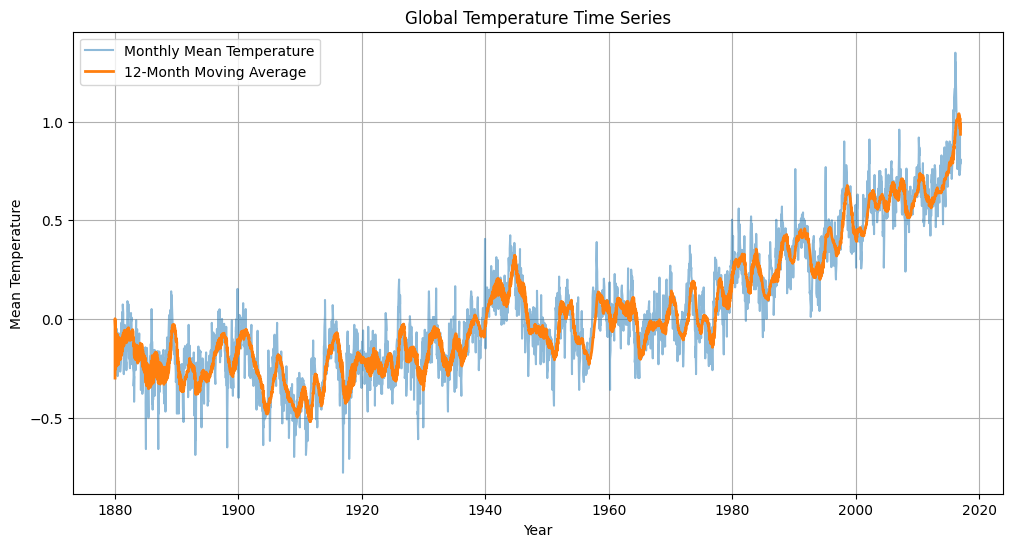

In [ ]:
import matplotlib.pyplot as plt

df_temp = df_temp.sort_values('Date')

plt.figure(figsize=(12,6))

plt.plot(df_temp['Date'], df_temp['Mean'],
         label='Monthly Mean Temperature',
         alpha=0.5)

plt.plot(df_temp['Date'], df_temp['Moving_Avg'],
         label='12-Month Moving Average',
         linewidth=2)

plt.title("Global Temperature Time Series")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.legend()

plt.grid(True)

plt.show()


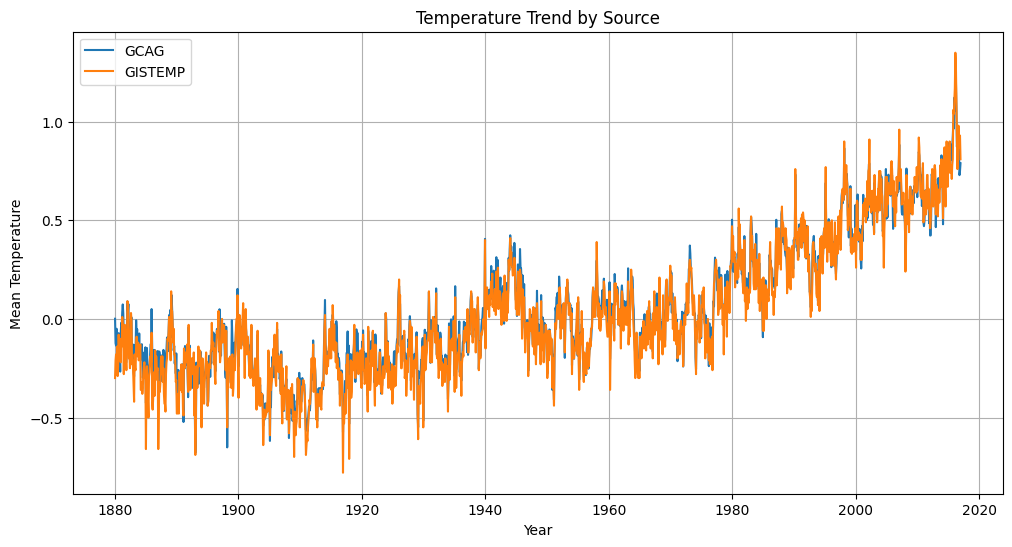

In [ ]:
plt.figure(figsize=(12,6))

for source, data in df_temp.groupby('Source'):
    plt.plot(data['Date'], data['Mean'], label=source)

plt.title("Temperature Trend by Source")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True)

plt.show()

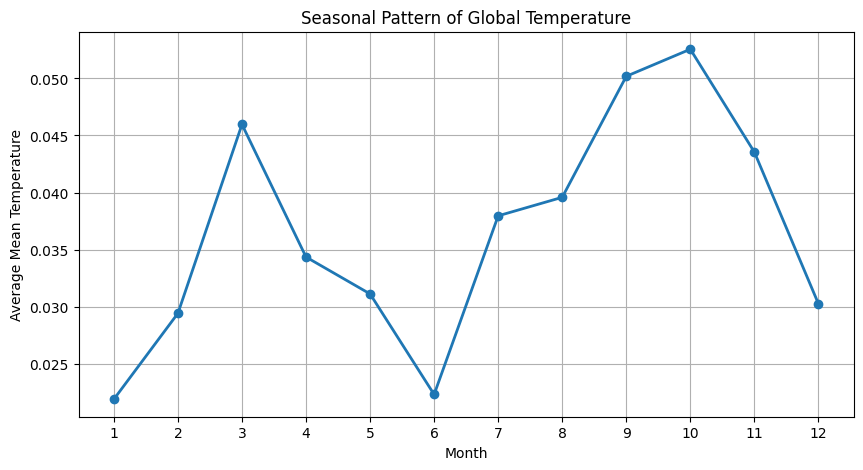

In [ ]:
monthly_avg = df_temp.groupby('Month')['Mean'].mean()

monthly_avg

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(monthly_avg.index, monthly_avg.values,
         marker='o', linewidth=2)

plt.title("Seasonal Pattern of Global Temperature")
plt.xlabel("Month")
plt.ylabel("Average Mean Temperature")

plt.xticks(range(1,13))
plt.grid(True)

plt.show()